Import required libraries:
- `random` for choosing a random 
- `matplotlib` for plotting

In [2]:
import random
import matplotlib.pyplot as plt

My variant is Variant 4: `UPPERCASE and LOWERCASE RUSSIAN`

Password generator class, which takes lw_variant string in constructor and has a method to generate password.

In [3]:
class PasswordGenerator:

    def __init__(self, lw_variant: str):
        self.charset = list(lw_variant)

    def generate(self, length: int):
        return ''.join(random.choice(self.charset) for _ in range(length))

Class that would plot frequency of each symbol

In [4]:
class FrequencyPlotter:
    def __init__(self, password_generator):
        self.password_generator = password_generator

    def plot_frequency(self, password_length: int, num_samples: int) -> object:
        frequencies = {symbol: 0 for symbol in self.password_generator.charset}
        for _ in range(num_samples):
            password = self.password_generator.generate(password_length)
            for symbol in password:
                frequencies[symbol] += 1

        symbols = list(frequencies.keys())
        counts = list(frequencies.values())

        plt.bar(symbols, counts)
        plt.xlabel('Symbol')
        plt.ylabel('Frequency')
        plt.title('Frequency of Symbols in Generated Passwords')
        plt.show()

Now, we'll see the plot of frequency of each symbol in the charset:

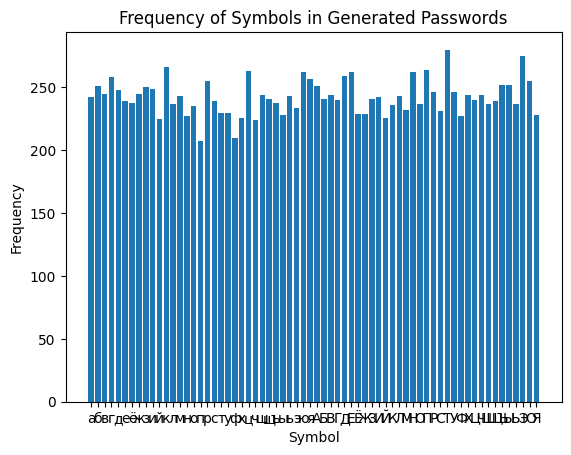

In [5]:
generator = PasswordGenerator('абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ')
plotter = FrequencyPlotter(generator)

plotter.plot_frequency(password_length=16, num_samples=1000)

Now, we'll see how long it takes to brutforce a password of a certain length:

In [6]:
import itertools
import time

class BruteForceTimePlotter:
    def __init__(self, password_generator):
        self.password_generator = password_generator

    def estimate_brute_force_time(self, password_length: int, samples: int):
        charset = self.password_generator.charset
        total_time = 0

        passwords = [''.join(i) for i in itertools.product(charset, repeat=password_length)]
        for _ in range(samples):
            generated_password = self.password_generator.generate(length=password_length)
            start_time = time.time()
            for password in passwords:
                if password == generated_password:
                    break
            end_time = time.time()
            total_time += end_time - start_time

        return total_time / samples


    def plot_average_time(self, max_password_length: int, samples: int) -> object:
        lengths = list(range(1, max_password_length + 1))
        average_times = []

        for length in lengths:
            brute_force_time = self.estimate_brute_force_time(length, samples)
            average_times.append(brute_force_time)

        plt.plot(lengths, average_times)
        plt.xlabel('Password Length')
        plt.ylabel('Estimated Brute Force Time (seconds)')
        plt.title('Estimated Brute Force Time for Passwords of Different Lengths')
        plt.show()

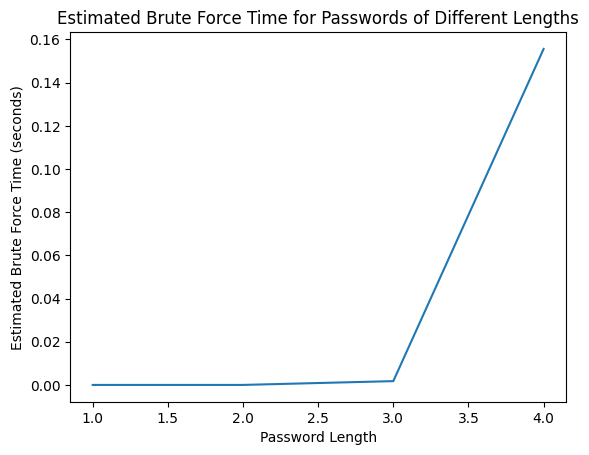

In [7]:
generator = PasswordGenerator('абвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ')
plotter = BruteForceTimePlotter(generator)
plotter.plot_average_time(max_password_length=4, samples=10)

Recommendations:
- Make more complex and long passwords, as they take more time to be bruteforced.
- Avoid common patterns, such as '12345', 'abcdef', as they may be the first ones, that the hacker would try.
- Unique passwords: your password maybe compromised on other website.
- Use computer generated random passwords for valuable information for common users.